# 📘 GDP vs. Unemployment Rate Analysis
**Course:** CS-2704 — Data Analytics Using Python  
**Team Members:** Jaspinder Singh, Syed Owais Haider Kazmi, Nomaan Imran Saiyed

In this notebook, we analyze the relationship between a country's GDP per capita and its unemployment rate using publicly available World Bank data. We apply descriptive and predictive analytics to explore whether richer countries tend to have lower unemployment rates.

## 🔧 1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
sns.set(style='whitegrid')

## 📂 2. Load and Prepare the Dataset

In [ ]:
# Load merged dataset and clean it
df = pd.read_csv('merged_data.csv')
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df['Log_GDP'] = np.log(df['GDP_per_capita'] + 1)
df.head()

,Country Name,Country Code,Year,GDP_per_capita,Unemployment_rate,Log_GDP
0,Africa Eastern and Southern,AFE,1991,862.848274,8.179629,6.761397
1,Africa Western and Central,AFW,1991,603.878908,4.158680,6.405028
2,Angola,AGO,1991,881.919488,16.855000,6.783234
3,Albania,ALB,1991,336.586995,10.304000,5.821823
4,Arab World,ARB,1991,2048.809755,11.914508,7.625502


## 📊 3. Descriptive Statistics

In [ ]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7598 entries, 0 to 7597
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       7598 non-null   object 
 1   Country Code       7598 non-null   object 
 2   Year               7598 non-null   int64  
 3   GDP_per_capita     7598 non-null   float64
 4   Unemployment_rate  7598 non-null   float64
 5   Log_GDP            7598 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 356.3+ KB
None


,Year,GDP_per_capita,Unemployment_rate,Log_GDP
count,7598.000000,7598.000000,7598.000000,7598.000000
mean,2007.046460,10584.622129,7.885990,8.183741
std,9.462803,16371.886654,5.578669,1.561785
min,1991.000000,22.952133,0.100000,3.176057
25%,1999.000000,1037.416058,4.090288,6.945452
50%,2007.000000,3455.251120,6.336876,8.147940
75%,2015.000000,12163.154422,10.319000,9.406249
max,2023.000000,133711.794436,38.800000,11.803449


## 📈 4. Visual Analysis

### 🔥 4.1 Correlation Heatmap

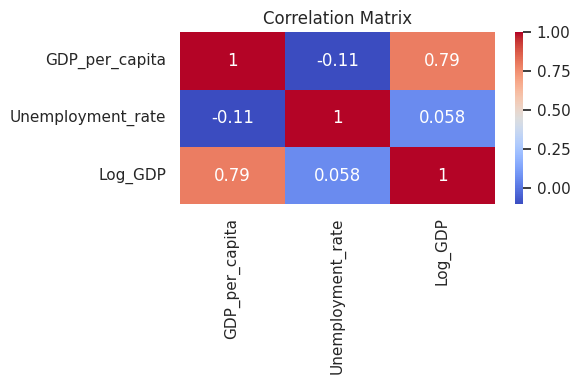

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['GDP_per_capita', 'Unemployment_rate', 'Log_GDP']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### 📉 4.2 Scatter Plots

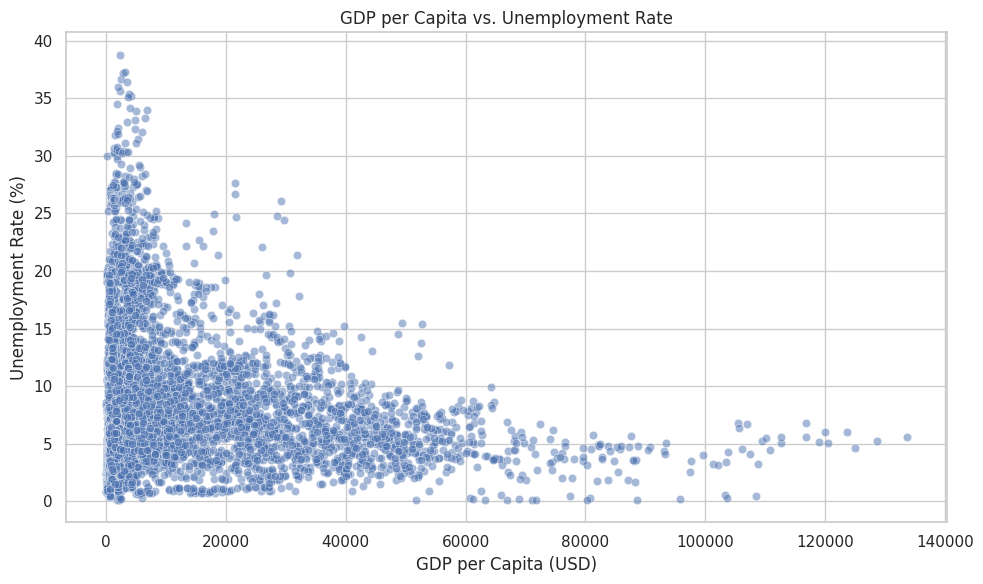

In [ ]:
# GDP vs. Unemployment Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP_per_capita', y='Unemployment_rate', alpha=0.5)
plt.title('GDP per Capita vs. Unemployment Rate')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

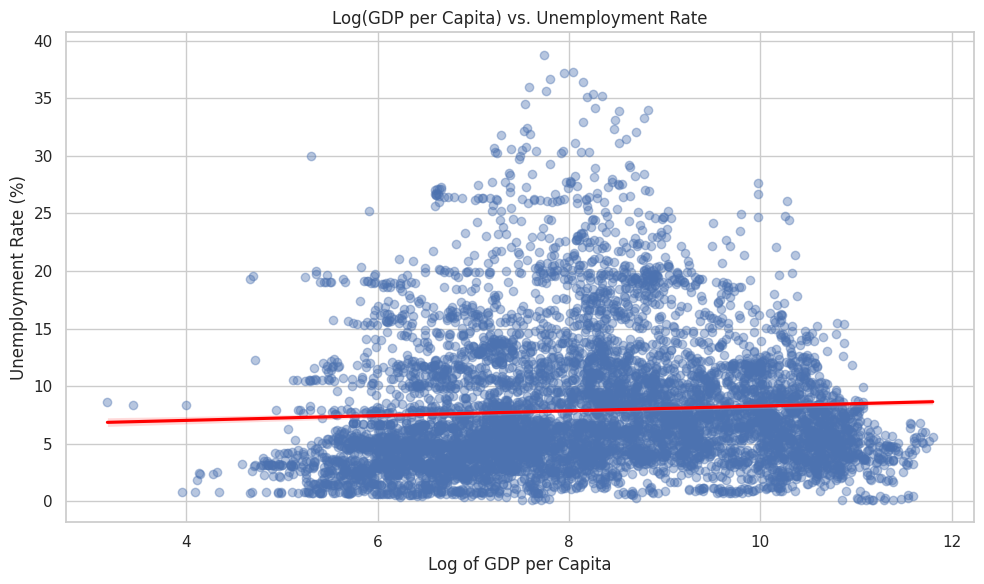

In [ ]:
# Log(GDP) vs. Unemployment Rate with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Log_GDP', y='Unemployment_rate', scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title('Log(GDP per Capita) vs. Unemployment Rate')
plt.xlabel('Log of GDP per Capita')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

## 🧩 5. Group Comparisons and Rankings

### 📦 5.1 Unemployment Rate by GDP Category

<ipython-input-7-939fb6a20a87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='GDP_Category', y='Unemployment_rate', palette='Set2')


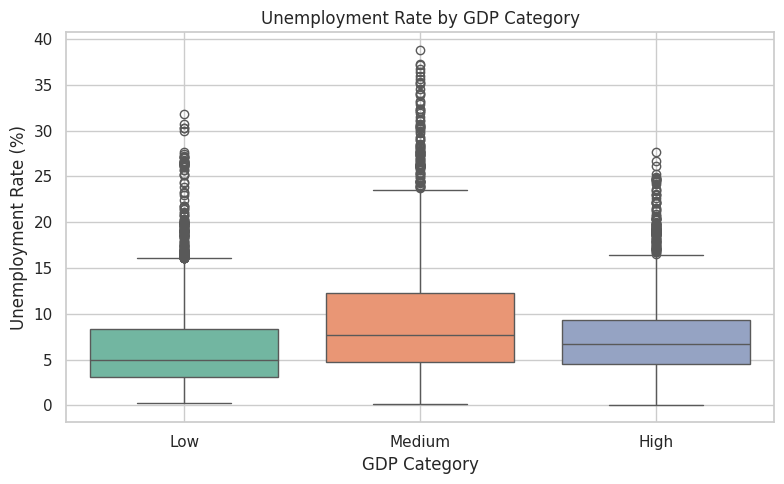

<ipython-input-7-939fb6a20a87>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('GDP_Category')['Unemployment_rate'].agg(['mean', 'median', 'std', 'count'])


,mean,median,std,count
GDP_Category,,,,
Low,6.626002,4.937192,5.218054,2533
Medium,9.551326,7.688500,6.590104,2532
High,7.481298,6.755000,4.267452,2533


In [ ]:
df['GDP_Category'] = pd.qcut(df['GDP_per_capita'], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='GDP_Category', y='Unemployment_rate', palette='Set2')
plt.title('Unemployment Rate by GDP Category')
plt.xlabel('GDP Category')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
df.groupby('GDP_Category')['Unemployment_rate'].agg(['mean', 'median', 'std', 'count'])

### 🏅 5.2 Top and Bottom 10 Countries

<ipython-input-8-ced5c4730d8b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gdp, y='Country Name', x='GDP_per_capita', ax=axs[0, 0], palette='Greens_d')
<ipython-input-8-ced5c4730d8b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_gdp, y='Country Name', x='GDP_per_capita', ax=axs[0, 1], palette='Reds_d')
<ipython-input-8-ced5c4730d8b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_unemp, y='Country Name', x='Unemployment_rate', ax=axs[1, 0], palette='Purples_d')
<ipython-input-8-ced5c4730d8b>:14: Futur

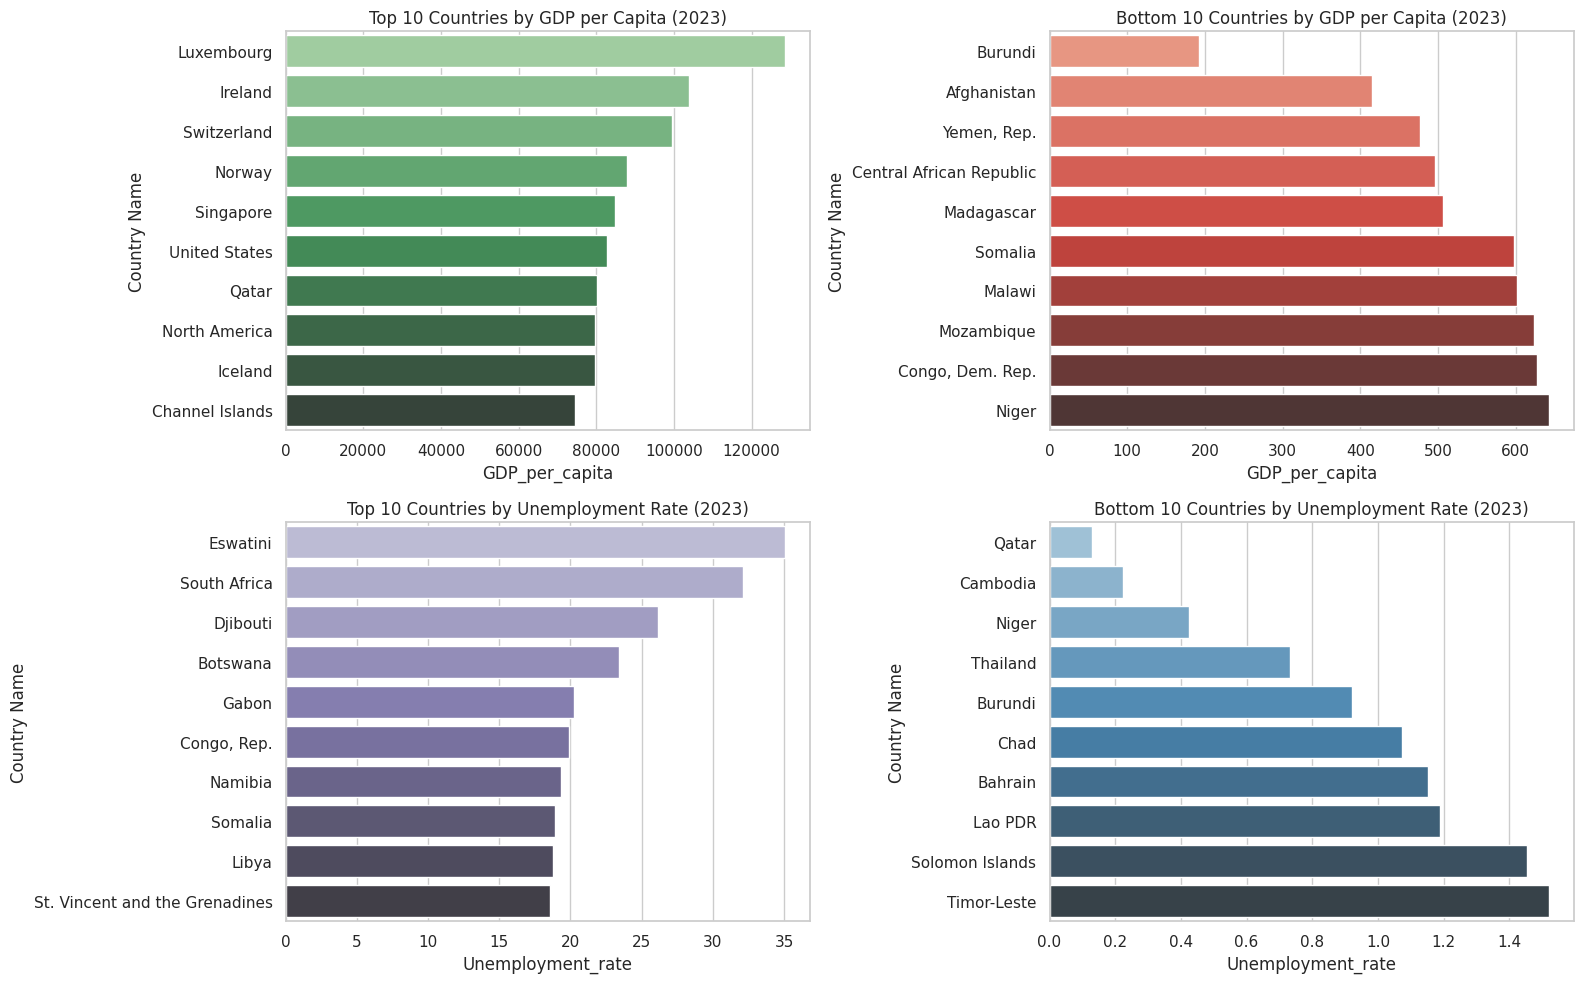

In [ ]:
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]
top_gdp = df_latest.sort_values(by='GDP_per_capita', ascending=False).head(10)
bottom_gdp = df_latest.sort_values(by='GDP_per_capita', ascending=True).head(10)
top_unemp = df_latest.sort_values(by='Unemployment_rate', ascending=False).head(10)
bottom_unemp = df_latest.sort_values(by='Unemployment_rate', ascending=True).head(10)
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
sns.barplot(data=top_gdp, y='Country Name', x='GDP_per_capita', ax=axs[0, 0], palette='Greens_d')
axs[0, 0].set_title('Top 10 Countries by GDP per Capita (2023)')
sns.barplot(data=bottom_gdp, y='Country Name', x='GDP_per_capita', ax=axs[0, 1], palette='Reds_d')
axs[0, 1].set_title('Bottom 10 Countries by GDP per Capita (2023)')
sns.barplot(data=top_unemp, y='Country Name', x='Unemployment_rate', ax=axs[1, 0], palette='Purples_d')
axs[1, 0].set_title('Top 10 Countries by Unemployment Rate (2023)')
sns.barplot(data=bottom_unemp, y='Country Name', x='Unemployment_rate', ax=axs[1, 1], palette='Blues_d')
axs[1, 1].set_title('Bottom 10 Countries by Unemployment Rate (2023)')
plt.tight_layout()
plt.show()

## 🔮 6. Predictive Modeling

### 📉 6.1 Linear Regression

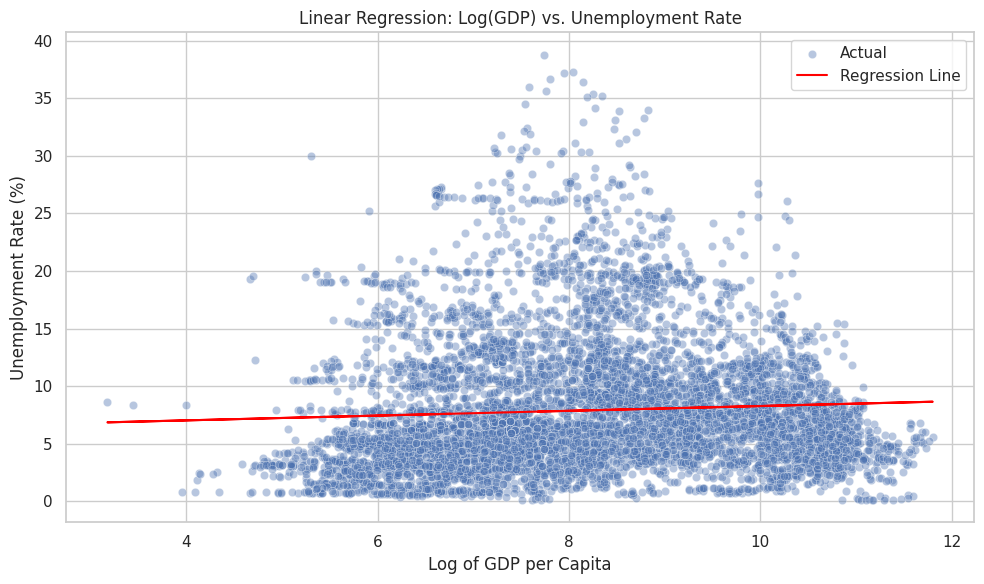

(0.003381370061750766, 31.01223371407787)

In [ ]:
X = df[['Log_GDP']]
y = df['Unemployment_rate']
lr_model = LinearRegression()
lr_model.fit(X, y)
y_pred = lr_model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Log_GDP'], y=y, alpha=0.4, label='Actual')
plt.plot(X['Log_GDP'], y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Log(GDP) vs. Unemployment Rate')
plt.xlabel('Log of GDP per Capita')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r2_score(y, y_pred), mean_squared_error(y, y_pred)

### 🧮 6.2 Polynomial Regression

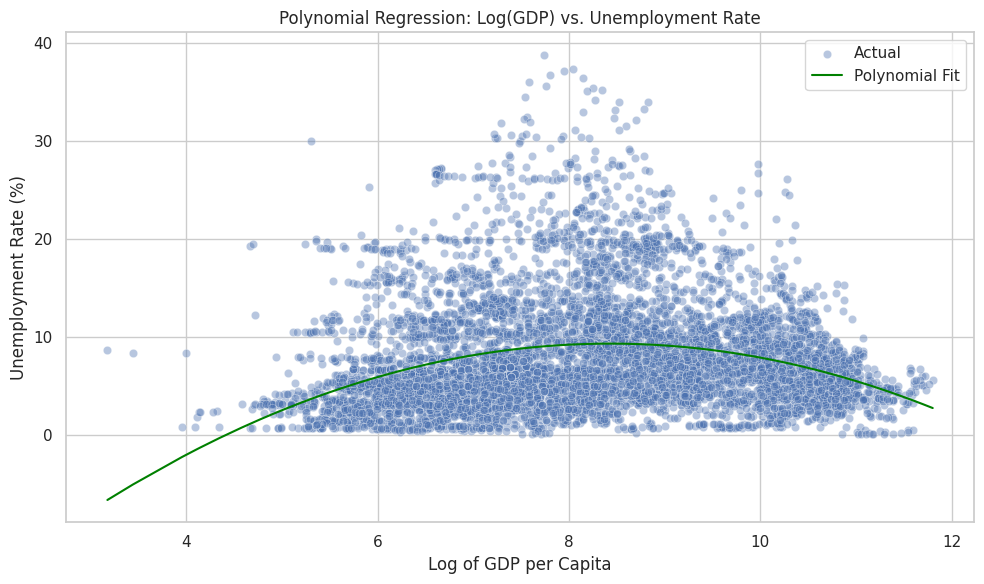

(0.07446396979455938, 28.800324233663382)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_poly_pred = poly_model.predict(X_poly)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Log_GDP'], y=y, alpha=0.4, label='Actual')
sorted_idx = X['Log_GDP'].argsort()
plt.plot(X['Log_GDP'].iloc[sorted_idx], y_poly_pred[sorted_idx], color='green', label='Polynomial Fit')
plt.title('Polynomial Regression: Log(GDP) vs. Unemployment Rate')
plt.xlabel('Log of GDP per Capita')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
r2_score(y, y_poly_pred), mean_squared_error(y, y_poly_pred)

### 🌳 6.3 Random Forest Regression

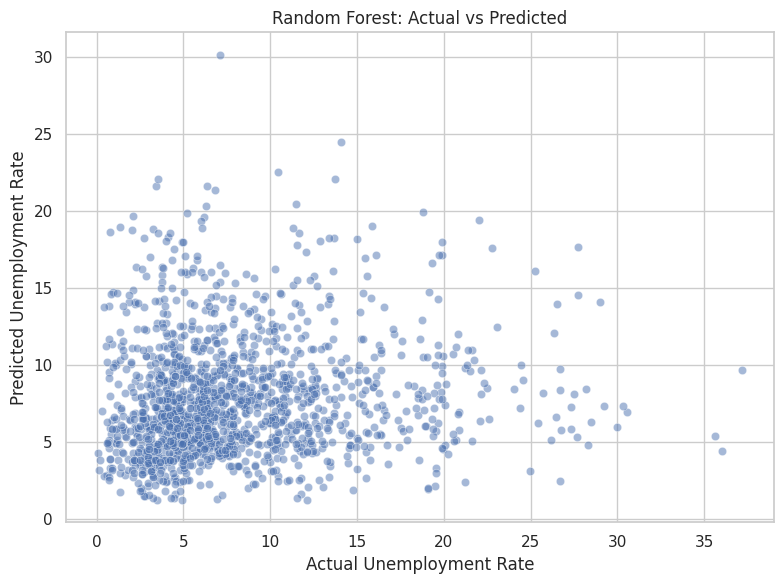

(-0.3111969127376635, 41.027467855999106)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_rf_pred, alpha=0.5)
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()
r2_score(y_test, y_rf_pred), mean_squared_error(y_test, y_rf_pred)

## 🧠 7. Final Insights & Interpretation

## 📐 Hypothesis Testing Using p-values
**Null Hypothesis (H₀):** There is no relationship between GDP per capita and unemployment rate.  
**Alternative Hypothesis (H₁):** There is a significant relationship (expected to be negative).

We will test this using:
- Pearson correlation test
- p-value from OLS linear regression

In [ ]:
# Pearson correlation test between Log(GDP) and Unemployment Rate
from scipy.stats import pearsonr
corr, p_val = pearsonr(df['Log_GDP'], df['Unemployment_rate'])
print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("✅ Statistically significant relationship. Reject the null hypothesis.")
else:
    print("❌ No significant relationship. Fail to reject the null hypothesis.")

In [ ]:
# OLS Regression model to test coefficient significance
import statsmodels.api as sm
X = sm.add_constant(df['Log_GDP'])
y = df['Unemployment_rate']
ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

### 📌 Key Takeaways:
- All models indicate a **weak relationship** between GDP and unemployment.
- Even **non-linear models like Random Forest** struggled, reinforcing that unemployment is **multi-dimensional**.
- Visual trends provided deeper insights than predictive models alone.

### 🔍 Future Work:
- Include more socioeconomic features (e.g., inflation, education).
- Try clustering countries or analyzing by region.
- Explore temporal models or case studies over time.